## I - TRAIN AN IMAGE CLASSIFIER USING KERAS

__This tutorial is based on Keras documentaion__

 __Note__ : you need to install: scipy, numpy, PIL, matplotlib, keras  

In [47]:
#DO SOME IMPORTS
import os
import os.path as op
import keras
from os.path import expanduser
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import backend as K
keras.backend.image_data_format()
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from PIL import Image
# from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

In [48]:
root_dir = expanduser(".")
model_root_dir = op.join (root_dir,"models" )
model_path = op.join (model_root_dir, "final")
checkpoint_path = op.join (model_root_dir, "model.{epoch:02d}-{loss:.2f}.hdf5")


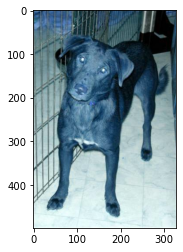

(499, 327, 3)


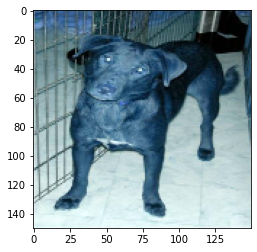

(150, 150, 3)


In [49]:
original_image = cv2.imread('data/train/dogs/dog.1.jpg')
#show an image
plt.imshow(original_image)
plt.show()
print(original_image.shape)

reshaped_image = cv2.resize(original_image,(150,150))
#save the reshaped image as a file
cv2.imwrite('data/reshaped_image.png',reshaped_image)

dog = cv2.imread('data/reshaped_image.png')
plt.imshow(dog)
plt.show()
print (reshaped_image.shape)


### LOAD DATA : https://www.kaggle.com/tongpython/cat-and-dog


In [50]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/dogs/dog.1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='data/preview', save_prefix='0', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

(499, 327, 3)


### BUILD MODEL

In [53]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True) 
img = load_img('model1.png')
img.show()
model.summary()

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 97, 97, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4

### NETWOK PARAMETERS

In [55]:
batch_size = 128 #512
nb_train_samples = 8005
nb_validation_samples = 2023
nb_epoch = 200

In [56]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255, # normalize pixel values to [0,1]
        shear_range=0.2,# randomly applies shearing transformation
        zoom_range=0.2,# randomly applies shearing transformation
        horizontal_flip=True)# randomly flip the images

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### TRAIN MODEL and SAVE MODEL

In [58]:
#Comment out this part to train your model
history = model.fit_generator(
        train_generator,
        steps_per_epoch=8005 // batch_size,
        epochs=nb_epoch,
        validation_data=validation_generator,
        validation_steps=2023 // batch_size,
        callbacks = [ModelCheckpoint(checkpoint_path)])
model.save(model_path)  
model.save(model_path)#weights_path)

Epoch 1/200


InvalidArgumentError:  Input to reshape is a tensor with 2367488 values, but the requested shape requires a multiple of 33856
	 [[node sequential_17/flatten/Reshape (defined at <ipython-input-58-66dc66056302>:2) ]] [Op:__inference_train_function_4274]

Function call stack:
train_function


### LOADING THE TRAINING MODEL

In [ ]:
model.load_weights('./models/model.113-0.19.hdf5')

ValueError: You are trying to load a weight file containing 5 layers into a model with 13 layers.

### VISUALIZATION OF THE TRAINING HISTORY

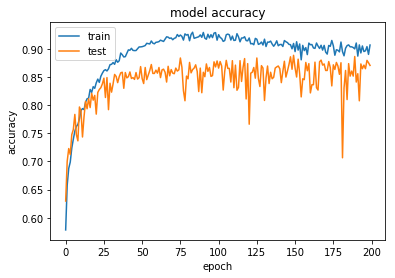

<Figure size 432x288 with 0 Axes>

In [14]:
#Comment out this part to visualize your model
##summarize history for accuracy
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig('accuracy.pdf')

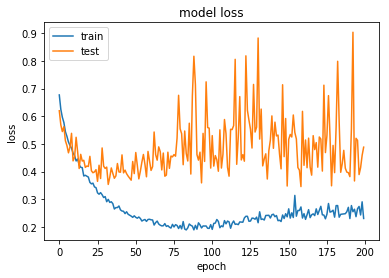

<Figure size 432x288 with 0 Axes>

In [15]:
#Comment out this part to visualize your model
#### summarize history for loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
#plt.savefig('loss.pdf')

### Evaluating on test set

In [16]:
#Comment out this part to evaluate your model
#model.evaluate_generator(validation_generator, nb_validation_samples)

[0.5475189818062938, 0.8285249581846179]

## II- Use pre-trained models

In [29]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [30]:
#vgg16
vgg16_feature_extract = VGG16(weights='imagenet', include_top=True)
plot_model(vgg16_feature_extract, to_file='vgg16.png', show_shapes=True, show_layer_names=True) 
img = load_img('vgg16.png')
img.show()
#vgg16_feature_extract.summary()

In [31]:
#vgg19
vgg19_feature_extract = VGG19(weights='imagenet', include_top=True)
plot_model(vgg19_feature_extract, to_file='vgg19.png', show_shapes=True, show_layer_names=True) 
img = load_img('vgg19.png')
img.show()
#vgg19_feature_extract.summary()

In [32]:
#resnet
resnet_feature_extract = ResNet50(weights='imagenet', include_top=True)
plot_model(resnet_feature_extract, to_file='resnet.png', show_shapes=True, show_layer_names=True) 
img = load_img('resnet.png')
img.show()
#resnet_feature_extract.summary()

## CLASSIFY NEW IMAGES

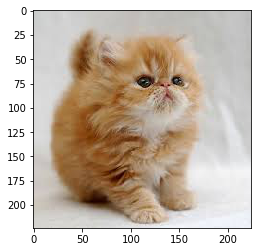

In [33]:
#img = image.load_img('test.jpg', target_size=(224, 224))
img = image.load_img('cat.jpg', target_size=(224, 224))
#img = image.load_img('dog.jpg', target_size=(224, 224))

%matplotlib inline
plt.imshow(img)

In [35]:
#img = image.load_img('elephant.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#preds = vgg16_feature_extract.predict(x)
#preds = vgg19_feature_extract.predict(x)
preds = resnet_feature_extract.predict(x)
decode_predictions(preds, top=10)[0]

[('n02123394', 'Persian_cat', 0.9997496),
 ('n02086079', 'Pekinese', 7.307477e-05),
 ('n02085782', 'Japanese_spaniel', 3.2587282e-05),
 ('n02123045', 'tabby', 3.1419266e-05),
 ('n02328150', 'Angora', 2.9787501e-05),
 ('n02112137', 'chow', 1.4352736e-05),
 ('n02112018', 'Pomeranian', 1.3843957e-05),
 ('n02127052', 'lynx', 9.0863905e-06),
 ('n02123159', 'tiger_cat', 8.089144e-06),
 ('n02112706', 'Brabancon_griffon', 6.395916e-06)]